In [1]:
pip install pandas openpyxl

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

# Step 1: Load the dataset 

In [ ]:
df = pd.read_csv('StudentsPerformance.csv')

# Step 2: Data Cleaning

In [4]:
# Remove duplicate rows
df = df.drop_duplicates()

In [5]:
# Remove duplicate rows
df = df.drop_duplicates()

In [6]:
# Check for missing values and drop rows with any missing data
df = df.dropna()

In [7]:
# Standardize gender column - capitalize first letters
df['gender'] = df['gender'].str.capitalize()

In [8]:
# Similarly, if needed, standardize other categorical columns
categorical_cols = ['race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
for col in categorical_cols:
    df[col] = df[col].str.title()


In [9]:
# Ensure score columns are numeric
score_cols = ['math score', 'reading score', 'writing score']
for col in score_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [10]:
# Drop any rows where scores could not be converted to numbers (if any)
df = df.dropna(subset=score_cols)

# Step 3: Calculate Key Metrics

In [11]:
# Calculate overall average, max, min for each subject
summary_stats = pd.DataFrame({
    'Metric': ['Average', 'Highest', 'Lowest'],
})

for col in score_cols:
    averages = [
        df[col].mean(),
        df[col].max(),
        df[col].min()
    ]
    summary_stats[col] = averages

# Optional: 

In [12]:
# Calculate gender-wise averages
gender_avg = df.groupby('gender')[score_cols].mean().reset_index()

# Step 4: Write cleaned data and summary to Excel in different sheets

In [13]:
with pd.ExcelWriter('student_performance_cleaned.xlsx', engine='openpyxl') as writer:
    df.to_excel(writer, sheet_name='Cleaned Data', index=False)
    summary_stats.to_excel(writer, sheet_name='Summary Stats', index=False)
    gender_avg.to_excel(writer, sheet_name='Gender Averages', index=False)

print("Cleaned data and summary saved in 'student_performance_cleaned.xlsx'")


Cleaned data and summary saved in 'student_performance_cleaned.xlsx'


In [15]:
# Show info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None


In [16]:
print(df.head())

   gender race/ethnicity parental level of education         lunch  \
0  Female        Group B           Bachelor'S Degree      Standard   
1  Female        Group C                Some College      Standard   
2  Female        Group B             Master'S Degree      Standard   
3    Male        Group A          Associate'S Degree  Free/Reduced   
4    Male        Group C                Some College      Standard   

  test preparation course  math score  reading score  writing score  
0                    None          72             72             74  
1               Completed          69             90             88  
2                    None          90             95             93  
3                    None          47             57             44  
4                    None          76             78             75  


In [17]:
# Subject-wise averages
subject_avg = df[['math score', 'reading score', 'writing score']].mean()
print("\nSubject-wise averages:")
print(subject_avg)


Subject-wise averages:
math score       66.089
reading score    69.169
writing score    68.054
dtype: float64


In [18]:
# Gender-wise averages
gender_avg = df.groupby('gender')[['math score', 'reading score', 'writing score']].mean()
print("\nGender-wise averages:")
print(gender_avg)


Gender-wise averages:
        math score  reading score  writing score
gender                                          
Female   63.633205      72.608108      72.467181
Male     68.728216      65.473029      63.311203


# Visualize Subject-wise and Gender-wise Performance

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns


C:\Users\pc726\AppData\Local\Temp\ipykernel_3008\3614157530.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=subject_avg.index, y=subject_avg.values, palette='viridis')


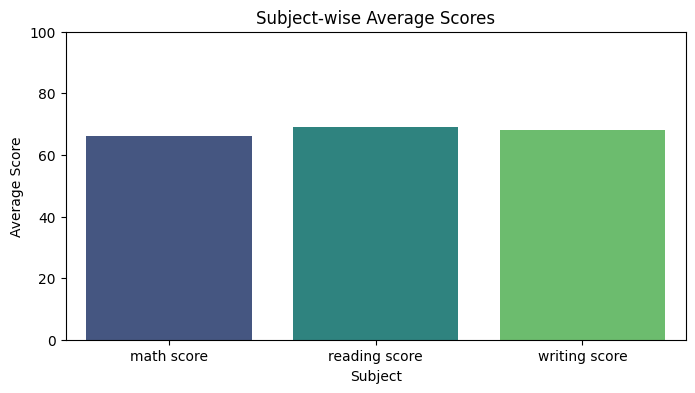

In [20]:
# Subject-wise averages bar chart
plt.figure(figsize=(8,4))
sns.barplot(x=subject_avg.index, y=subject_avg.values, palette='viridis')
plt.title('Subject-wise Average Scores')
plt.ylabel('Average Score')
plt.xlabel('Subject')
plt.ylim(0, 100)
plt.show()



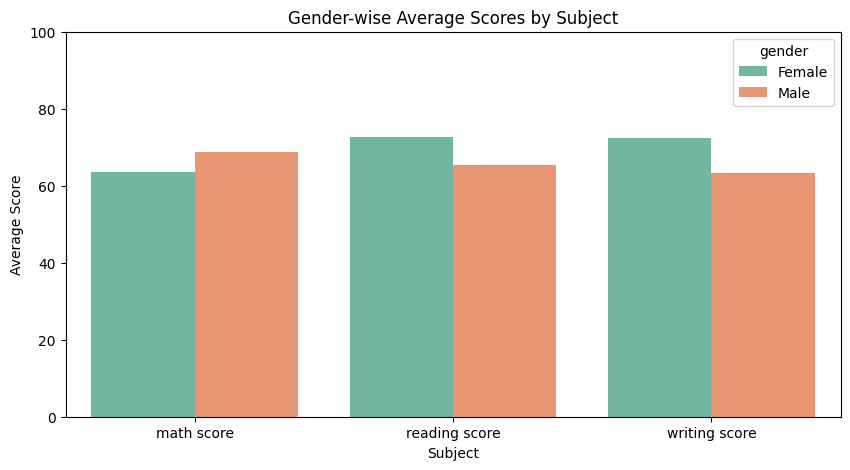

In [21]:
# Gender-wise (clustered) bar chart
gender_avg_plot = gender_avg.reset_index().melt(id_vars='gender', var_name='Subject', value_name='Average Score')

plt.figure(figsize=(10,5))
sns.barplot(x='Subject', y='Average Score', hue='gender', data=gender_avg_plot, palette='Set2')
plt.title('Gender-wise Average Scores by Subject')
plt.ylim(0, 100)
plt.show()

# Save cleaned data to Excel

In [23]:
df_cleaned = pd.DataFrame(df)
output_file = 'student_performance_cleaned.xlsx'
df_cleaned.to_excel(output_file, index=False)

print(f"Cleaned data saved as {output_file}")

Cleaned data saved as student_performance_cleaned.xlsx
